In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

### 1. DATA PRE-PROCESSING

In [3]:
industry_raw = pd.read_excel('Industry_Portfolios.xlsx')
industry_raw = industry_raw.set_index('Date')
industry_raw.head(2)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16


In [4]:
industry_raw.index = pd.to_datetime(industry_raw.index, format = '%Y%m')
industry_raw.index = industry_raw.index.to_period('M')
industry_raw.head(2)

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
2004-01,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
2004-02,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16


In [5]:
def ret_vol_calc(returns, mode='arithmetic', periods=12):
    """
    Calculate return and volatility statistics.
    
    Parameters:
    - returns (pd.Series or pd.DataFrame): Either a Series or a DataFrame of return columns.
    - mode (str): 'arithmetic' (for percentage change) or 'geometric' (for log return).
    - periods (int): The number of periods in a year (e.g., 12 for monthly, 252 for daily).
    
    Returns:
    pd.DataFrame: A DataFrame with calculated return, annualized return, standard deviation, 
                  annualized standard deviation, and CAGR.
    """
    
    # Check for return as Series or DataFrame and calculate accordingly
    if isinstance(returns, pd.Series) or isinstance(returns, pd.DataFrame):
        
        # Calculate the mean return and standard deviation
        if mode == 'arithmetic':
            mean_ret = returns.mean()
            std = returns.std()
        elif mode == 'geometric':
            mean_ret = np.log(1 + returns).mean()
            std = np.log(1 + returns).std()
        else:
            raise ValueError("Invalid mode. Choose either 'arithmetic' or 'geometric'.")
        
        # Annualization
        annualized_ret = mean_ret * periods
        annualized_std = std * np.sqrt(periods)
        
        # Calculate CAGR
        observations = len(returns)
        if mode == 'arithmetic':
            cum_ret = (1 + returns).prod()
            CAGR = cum_ret ** (periods / observations) - 1
        else:
            cum_ret = np.exp(np.log(1 + returns).cumsum().iloc[-1])
            CAGR = cum_ret ** (periods / observations) - 1
        
        # Combine the results into a DataFrame
        results = pd.DataFrame({
            'Return': mean_ret.round(4),
            'Annualized Return': annualized_ret.round(4),
            'Standard Deviation': std.round(4),
            'Annualized Standard Deviation': annualized_std.round(4),
            'CAGR': CAGR.round(4)
        })
        
        return results.T if isinstance(returns, pd.Series) else results
    
    else:
        raise TypeError("The returns input should be either a Series or DataFrame.")

In [6]:
industry_ret_sd =  ret_vol_calc(industry_raw/100, mode='arithmetic', periods=12)
industry_ret_sd

,Return,Annualized Return,Standard Deviation,Annualized Standard Deviation,CAGR
NoDur,0.0090,0.1083,0.0335,0.1159,0.1065
Durbl,0.0073,0.0880,0.0836,0.2897,0.0478
Manuf,0.0101,0.1215,0.0531,0.1840,0.1095
Enrgy,0.0123,0.1477,0.0608,0.2107,0.1330
HiTec,0.0077,0.0919,0.0538,0.1864,0.0770
Telcm,0.0088,0.1058,0.0445,0.1541,0.0979
Shops,0.0092,0.1100,0.0409,0.1418,0.1046
Hlth,0.0078,0.0941,0.0379,0.1312,0.0889
Utils,0.0091,0.1089,0.0370,0.1282,0.1053
Other,0.0049,0.0587,0.0558,0.1934,0.0403


In [7]:
industry_covar = (industry_raw/100).cov()
industry_covar

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
NoDur,0.001119,0.001845,0.001410,0.001053,0.001292,0.001197,0.001017,0.000995,0.000787,0.001444
Durbl,0.001845,0.006992,0.003918,0.002702,0.003547,0.002749,0.002744,0.001682,0.001275,0.003936
Manuf,0.001410,0.003918,0.002820,0.002315,0.002462,0.001955,0.001762,0.001360,0.001144,0.002631
Enrgy,0.001053,0.002702,0.002315,0.003698,0.001927,0.001537,0.001130,0.000963,0.001403,0.001832
HiTec,0.001292,0.003547,0.002462,0.001927,0.002896,0.001871,0.001784,0.001325,0.001030,0.002386
Telcm,0.001197,0.002749,0.001955,0.001537,0.001871,0.001979,0.001417,0.001151,0.001099,0.001961
Shops,0.001017,0.002744,0.001762,0.001130,0.001784,0.001417,0.001676,0.001018,0.000669,0.001923
Hlth,0.000995,0.001682,0.001360,0.000963,0.001325,0.001151,0.001018,0.001434,0.000748,0.001486
Utils,0.000787,0.001275,0.001144,0.001403,0.001030,0.001099,0.000669,0.000748,0.001370,0.000999
Other,0.001444,0.003936,0.002631,0.001832,0.002386,0.001961,0.001923,0.001486,0.000999,0.003116


### 2. EFFICIENT FRONTIER
* Here we use the Lagrange approach, which is the mathematically exact calculation

#### 2.1. Calculate the Markowitz portfolios from a given targeted returns

In [10]:
target_returns = np.arange(0, 0.021, 0.05/100)

In [11]:
def ef_unlimited_calc(n_assets, return_matrix, covar_matrix, targeted_returns):
    """
    Calculate the standard deviation (risk) of the portfolio for a range of target returns using Lagrange multipliers.
    Allows for unlimited short selling.
    
    Returns a DataFrame with standard deviation (risk) and targeted returns.
    """
    e = np.ones((n_assets, 1))  # 1-vector as a column vector
    return_matrix = return_matrix.reshape((n_assets, 1))  # Ensure return_matrix is a column vector
    
    # Alpha, delta, and zeta calculations
    alpha = (return_matrix.T @ np.linalg.inv(covar_matrix) @ e).item()  # Scalar
    delta = (e.T @ np.linalg.inv(covar_matrix) @ e).item()  # Scalar
    zeta = (return_matrix.T @ np.linalg.inv(covar_matrix) @ return_matrix).item()  # Scalar
    
    r_mv = alpha / delta  # Expected return of the minimum variance portfolio
    
    # Standard deviation of the minimum variance portfolio
    std_mv = np.sqrt(1 / delta)

    # Lists to store results for the efficient frontier
    std_devs = []
    targeted_returns_list = []

    # Calculate portfolio variance and standard deviation for each target return
    for targeted_return in targeted_returns:
        var_portfolio = (1 / delta) + ((delta / (zeta * delta - alpha**2)) * ((targeted_return - r_mv)**2))
        std_dev = np.sqrt(var_portfolio)
        std_devs.append(std_dev)
        targeted_returns_list.append(targeted_return)
    
    # Create a DataFrame with targeted returns and corresponding risks
    df = pd.DataFrame({
        'Targeted Return': targeted_returns_list,
        'Standard Deviation': std_devs })
    
    return df

In [12]:
n_assets = len(industry_ret_sd)
industry_ret =  industry_ret_sd['Return'].to_numpy()
ef_df = ef_unlimited_calc(n_assets, industry_ret, industry_covar, target_returns)

In [13]:
ef_df.head(10)

,Targeted Return,Standard Deviation
0,0.0000,0.049940
1,0.0005,0.048195
2,0.0010,0.046478
3,0.0015,0.044793
4,0.0020,0.043143
5,0.0025,0.041533
6,0.0030,0.039967
7,0.0035,0.038451
8,0.0040,0.036991
9,0.0045,0.035594


#### 2.2. When we need to access the MV portfolio

In [15]:
def ef_unlimited_MV(n_assets, return_matrix, covar_matrix, asset_names=None):
    """
    Calculate the weights, expected return, and standard deviation of the minimum-variance portfolio.
    
    Parameters:
    - n_assets (int): Number of assets in the portfolio.
    - return_matrix (array-like): Array of expected returns for each asset.
    - covar_matrix (array-like): Covariance matrix of the assets.
    - asset_names (list, optional): List of asset names corresponding to the assets in the portfolio.
    
    Returns:
    - pd.DataFrame: DataFrame with asset names and their weights in the MV portfolio.
    - float: Expected return of the MV portfolio.
    - float: Standard deviation of the MV portfolio.
    """
    e = np.ones((n_assets, 1))  # 1-vector as a column vector
    return_matrix = return_matrix.reshape((n_assets, 1))  # Ensure return_matrix is a column vector
    
    # Alpha and delta calculations
    alpha = (return_matrix.T @ np.linalg.inv(covar_matrix) @ e).item()  # Scalar
    delta = (e.T @ np.linalg.inv(covar_matrix) @ e).item()  # Scalar
    
    # Calculate weights of the minimum-variance portfolio
    w_mv = np.linalg.inv(covar_matrix) @ e / delta  # Vector of weights
    
    # Expected return and standard deviation of the minimum-variance portfolio
    r_mv = alpha / delta  # Expected return
    std_mv = np.sqrt(1 / delta)  # Standard deviation

    # Prepare DataFrame for weights with asset names
    if asset_names is None:
        asset_names = [f"Asset {i+1}" for i in range(n_assets)]  # Default asset names if none provided
    
    weights_df = pd.DataFrame({
        'Asset': asset_names,
        'Weight_MV': w_mv.flatten()
    })
    
    return weights_df, r_mv, std_mv

In [16]:
w_MV, r_MV, sd_MV = ef_unlimited_MV(n_assets, industry_ret, industry_covar, asset_names=industry_ret_sd.index)

In [17]:
w_MV

,Asset,Weight_MV
0,NoDur,0.543536
1,Durbl,-0.109556
2,Manuf,-0.151070
3,Enrgy,0.066282
4,HiTec,-0.073712
5,Telcm,-0.149203
6,Shops,0.589276
7,Hlth,0.142921
8,Utils,0.315347
9,Other,-0.173823


In [18]:
r_MV

0.010055021174374438

In [19]:
sd_MV

0.02697902407534031

#### 2.3. Plot the Efficient Frontier

In [21]:
def ef_unlimited_plot(df, std_mv, r_mv, mode = 'separate'):
    """
    Plot the efficient frontier using the DataFrame containing standard deviations and targeted returns.
    Mark the Minimum-Variance Portfolio on the plot.
    Display the region below the MVP as a dashed grey line if mode='separate'.
    
    Parameters:
    df (DataFrame): DataFrame containing 'Standard Deviation' and 'Targeted Return'.
    std_mv (float): Standard deviation of the minimum-variance portfolio.
    r_mv (float): Targeted return of the minimum-variance portfolio.
    mode (str): 'separate' to split the line into efficient and inefficient regions. 
                Any other value will plot the full frontier as a solid line.
    """
    plt.figure(figsize=(13, 6))

    if mode == 'separate':
        # Separate the data points below and above the minimum-variance portfolio
        below_mvp = df[df['Targeted Return'] < r_mv]
        above_mvp = df[df['Targeted Return'] >= r_mv]

        # Plot the part below the MVP as a dashed grey line
        if not below_mvp.empty:
            plt.plot(below_mvp['Standard Deviation'], below_mvp['Targeted Return'], 
                     linestyle='--', color='grey', linewidth=2, label="Inefficient Region")

        # Plot the part above the MVP as a solid blue line
        if not above_mvp.empty:
            plt.plot(above_mvp['Standard Deviation'], above_mvp['Targeted Return'], 'b-', 
                     label="Efficient Frontier", linewidth=2)
    else:
        # Plot the entire efficient frontier as a solid line
        plt.plot(df['Standard Deviation'], df['Targeted Return'], 'b-', label="Efficient Frontier", linewidth=2)

    # Plot the Minimum-Variance Portfolio
    plt.scatter(std_mv, r_mv, color='red', label='Minimum-Variance Portfolio', s=100, zorder=5)
    plt.xlabel("Standard Deviation", fontsize=12)
    plt.ylabel("Return", fontsize=12)
    plt.yticks(np.arange(0.00 ,0.021, 0.001)) # OPTIONAL
    plt.title("The Efficient Frontier", fontsize=14, color='darkblue')
    plt.grid(True, alpha = 0.3) # OPTIONAL
    plt.legend(loc='best')
    plt.show()

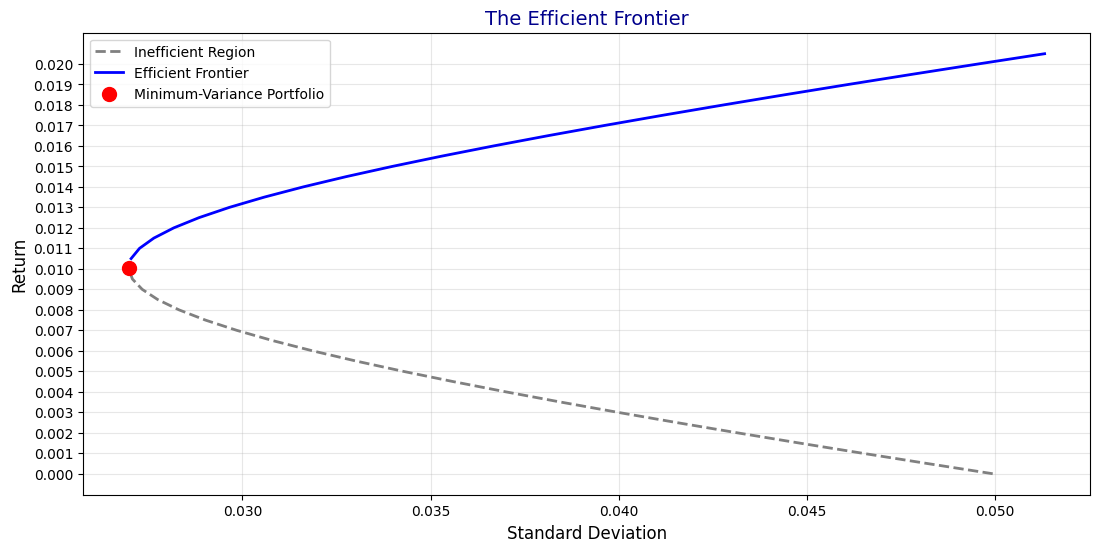

In [22]:
ef_unlimited_plot(ef_df, sd_MV, r_MV, mode = 'separate')

#### 2.4. Add the Capital Allocation (CAL) line
* Risk-free = 0.13% per month

In [24]:
def ef_unlimited_CAL_plot(df, std_mv, r_mv, risk_free_rate, mode='separate'):
    """
    Plot the efficient frontier along with the Capital Allocation Line (CAL).
    Mark the Minimum-Variance Portfolio and the Tangency Portfolio (Max Sharpe Ratio Portfolio).

    Parameters:
    df (DataFrame): DataFrame containing 'Standard Deviation' and 'Targeted Return'.
    std_mv (float): Standard deviation of the minimum-variance portfolio.
    r_mv (float): Targeted return of the minimum-variance portfolio.
    risk_free_rate (float): The risk-free rate used to calculate the CAL line.
    mode (str): 'separate' to split the line into efficient and inefficient regions.
                'single' to plot the full frontier as a solid line.
    """
    plt.figure(figsize=(13, 6))

    # Calculate the Sharpe ratio for each portfolio on the frontier
    df['Sharpe Ratio'] = (df['Targeted Return'] - risk_free_rate) / df['Standard Deviation']
    
    # Identify the maximum Sharpe ratio portfolio (tangency portfolio)
    max_sharpe_idx = df['Sharpe Ratio'].idxmax()
    max_sharpe_portfolio = df.loc[max_sharpe_idx]
    max_sharpe_std = max_sharpe_portfolio['Standard Deviation']
    max_sharpe_return = max_sharpe_portfolio['Targeted Return']

    # Plot the efficient frontier
    if mode == 'separate':
        # Sort data by targeted return (ascending)
        df_sorted = df.sort_values(by='Targeted Return')

        # Separate the data points below and above the minimum-variance portfolio
        below_mvp = df_sorted[df_sorted['Targeted Return'] < r_mv]
        above_mvp = df_sorted[df_sorted['Targeted Return'] >= r_mv]

        # Plot the part below the MVP as a dashed grey line
        if not below_mvp.empty:
            plt.plot(below_mvp['Standard Deviation'], below_mvp['Targeted Return'], 
                     linestyle='--', color='grey', linewidth=2, label="Inefficient Region")

        # Plot the part above the MVP as a solid blue line
        if not above_mvp.empty:
            plt.plot(above_mvp['Standard Deviation'], above_mvp['Targeted Return'], 'b-', label="Efficient Frontier", linewidth=2)
    else:
        # Plot the entire efficient frontier as a solid line
        plt.plot(df['Standard Deviation'], df['Targeted Return'], 'b-', label="Efficient Frontier", linewidth=2)

    # Plot the Minimum-Variance Portfolio
    plt.scatter(std_mv, r_mv, color='red', label='Minimum-Variance Portfolio', s=100, zorder=5)

    # Plot the Tangency Portfolio (Max Sharpe Ratio Portfolio)
    plt.scatter(max_sharpe_std, max_sharpe_return, color='green', label='Max Sharpe Ratio Portfolio', s=100, zorder=5)

    # Calculate and plot the CAL line
    cal_x = np.linspace(0, max_sharpe_std*1.5, 100)  # Extend the CAL line beyond the max Sharpe portfolio
    cal_y = risk_free_rate + (max_sharpe_return - risk_free_rate) / max_sharpe_std * cal_x  # CAL equation

    plt.plot(cal_x, cal_y, linestyle='--', color='orange', label='Capital Allocation Line (CAL)', linewidth=2)
    
    plt.xlabel("Standard Deviation", fontsize=12)
    plt.ylabel("Targeted Return", fontsize=12)
    plt.title("The Efficient Frontier with CAL", fontsize=14, color='darkblue')
    plt.yticks(np.arange(0.00 ,0.021, 0.001)) # OPTIONAL
    plt.grid(True, alpha = 0.3) # OPTIONAL
    plt.legend(loc='best')
    plt.show()

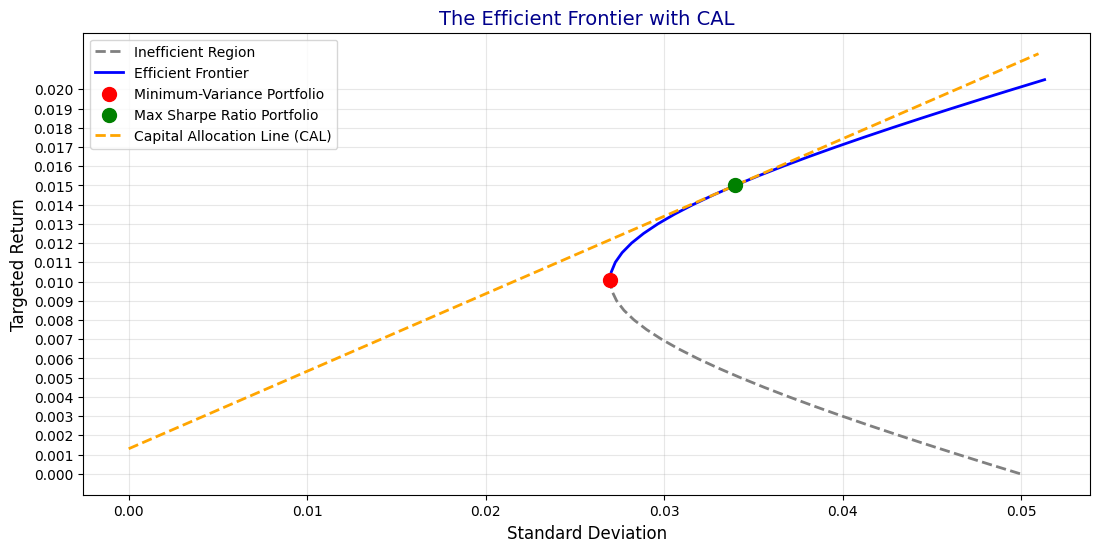

In [25]:
ef_unlimited_CAL_plot(ef_df, sd_MV, r_MV, risk_free_rate = 0.13/100, mode='separate')

#### 2.5. Access the Max Sharpe Ratio (tangency) portfolio

In [27]:
def ef_unlimited_MSR(n_assets, asset_names, return_matrix, covar_matrix, risk_free):

    e = np.ones((n_assets, 1))  # 1-vector as a column vector
    return_matrix = return_matrix.reshape((n_assets, 1))  # Ensuring return_matrix is a column vector
    
    # Alpha, delta, and zeta calculations
    alpha = (return_matrix.T @ np.linalg.inv(covar_matrix) @ e).item()  # Extract scalar
    delta = (e.T @ np.linalg.inv(covar_matrix) @ e).item()  # Extract scalar
    zeta = (return_matrix.T @ np.linalg.inv(covar_matrix) @ return_matrix).item()  # Extract scalar
    r_mv = alpha / delta  # Expected return of the minimum variance portfolio

    # Sharpe ratio related terms
    special_term = zeta - (2 * alpha * risk_free) + (delta * risk_free**2)
    tangency_slope = special_term ** 0.5
    tangency_er = (alpha * risk_free - zeta) / (delta * risk_free - alpha)
    tangency_sd = -tangency_slope / (delta * (risk_free - r_mv))

    # Calculate portfolio weights for the tangency portfolio
    lmbda = (tangency_er - risk_free) / special_term  # Lambda term for weight scaling
    tangency_weights = lmbda * np.linalg.inv(covar_matrix) @ (return_matrix - risk_free * e)  # Tangency portfolio weights
    
    # Calculate total weight of tangency portfolio
    total_tangency_weight = np.sum(tangency_weights)
    
    # Calculate risk-free allocation
    risk_free_allocation = 1 - total_tangency_weight
    
    # Format the output with asset names
    weights_info = "\n".join([f'{name}: {weight:.4f}' for name, weight in zip(asset_names, tangency_weights.flatten())])

    return (f'The weights vector of the tangency portfolio is:\n{weights_info};\n'
            f'The allocation to the risk-free asset is {risk_free_allocation:.4f};\n'
            f'The expected return of the tangency portfolio is {tangency_er:.4f};\n'
            f'The standard deviation of the tangency portfolio is {tangency_sd:.4f};\n'
            f'The slope of the tangency portfolio (max Sharpe ratio) is {tangency_slope:.4f}.')

In [28]:
MSR = ef_unlimited_MSR(n_assets, industry_ret_sd.index, industry_ret, industry_covar, risk_free = 0.13/100)
print(MSR)

The weights vector of the tangency portfolio is:
NoDur: 0.5607
Durbl: -0.2164
Manuf: 0.7058
Enrgy: 0.1035
HiTec: -0.3569
Telcm: -0.0998
Shops: 0.9992
Hlth: 0.0691
Utils: 0.1404
Other: -0.9057;
The allocation to the risk-free asset is -0.0000;
The expected return of the tangency portfolio is 0.0148;
The standard deviation of the tangency portfolio is 0.0335;
The slope of the tangency portfolio (max Sharpe ratio) is 0.4032.


* My gmail is binhnguyen.ibm@gmail.com
* For advance and complex models in practice, we can discuss for collaboration.
* Thank you. 